Analyze the linearity of the Covid objective over the context variables.

In [1]:
import matplotlib.pyplot as plt
import torch
from botorch.utils.transforms import unnormalize

from contextual_rs.test_functions.covid_exp_class import CovidSim, CovidEval


arms = torch.tensor(
    [
        [0.2, 0.2],
        [0.2, 0.3],
        [0.2, 0.4],
        [0.2, 0.5],
        [0.2, 0.6],
        [0.3, 0.2],
        [0.3, 0.3],
        [0.3, 0.4],
        [0.3, 0.5],
        [0.4, 0.2],
        [0.4, 0.3],
        [0.4, 0.4],
        [0.5, 0.2],
        [0.5, 0.3],
        [0.6, 0.2],
    ]
)

context_map = unnormalize(CovidSim.w_samples, CovidSim.bounds[:, 2:])
function = CovidSim()
true_function = CovidEval()


In [3]:
context_map

tensor([[0.0010, 0.0020, 0.0020],
        [0.0010, 0.0020, 0.0050],
        [0.0010, 0.0020, 0.0080],
        [0.0010, 0.0040, 0.0020],
        [0.0010, 0.0040, 0.0050],
        [0.0010, 0.0040, 0.0080],
        [0.0010, 0.0060, 0.0020],
        [0.0010, 0.0060, 0.0050],
        [0.0010, 0.0060, 0.0080],
        [0.0025, 0.0020, 0.0020],
        [0.0025, 0.0020, 0.0050],
        [0.0025, 0.0020, 0.0080],
        [0.0025, 0.0040, 0.0020],
        [0.0025, 0.0040, 0.0050],
        [0.0025, 0.0040, 0.0080],
        [0.0025, 0.0060, 0.0020],
        [0.0025, 0.0060, 0.0050],
        [0.0025, 0.0060, 0.0080],
        [0.0040, 0.0020, 0.0020],
        [0.0040, 0.0020, 0.0050],
        [0.0040, 0.0020, 0.0080],
        [0.0040, 0.0040, 0.0020],
        [0.0040, 0.0040, 0.0050],
        [0.0040, 0.0040, 0.0080],
        [0.0040, 0.0060, 0.0020],
        [0.0040, 0.0060, 0.0050],
        [0.0040, 0.0060, 0.0080]])

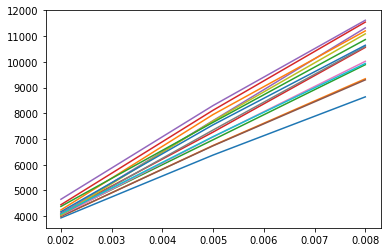

In [10]:
contexts = context_map[0: 3]
changing_idx = 2
X = torch.cat(
    [arms.unsqueeze(-2).repeat(1, 3, 1), contexts.repeat(arms.shape[0], 1, 1)], dim=-1
)

for x_ in X:
    plt.plot(contexts[:, changing_idx], true_function(x_))

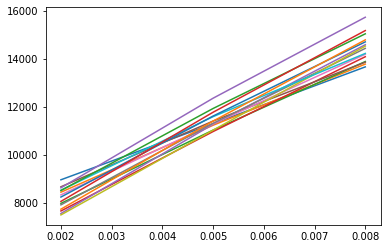

In [11]:
contexts = context_map[-3:]
changing_idx = 2
X = torch.cat(
    [arms.unsqueeze(-2).repeat(1, 3, 1), contexts.repeat(arms.shape[0], 1, 1)], dim=-1
)

for x_ in X:
    plt.plot(contexts[:, changing_idx], true_function(x_))

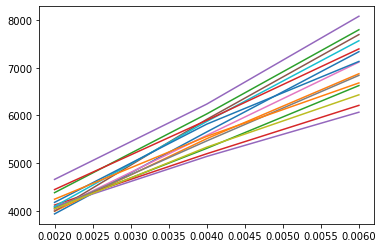

In [12]:
contexts = context_map[[0, 3, 6]]
changing_idx = 1
X = torch.cat(
    [arms.unsqueeze(-2).repeat(1, 3, 1), contexts.repeat(arms.shape[0], 1, 1)], dim=-1
)

for x_ in X:
    plt.plot(contexts[:, changing_idx], true_function(x_))


The original context parameterization was clearly leading to a linear structure. Let's try on the new alternatives
and see what they lead to.

In [2]:
from contextual_rs.test_functions.covid_exp_class import CovidSimV2

function = CovidSimV2()
seed = 1

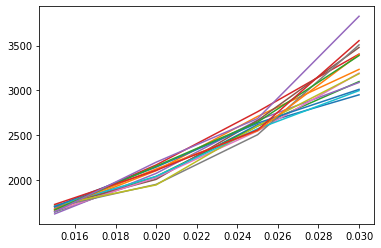

In [15]:
contexts = torch.tensor(
    [
        [0.015, 10],
        [0.02, 10],
        [0.025, 10],
        [0.03, 10],
        # [0.06, 10],
        # [0.08, 10],
        # [0.10, 10],
    ]
)
changing_idx = 0
X = torch.cat(
    [arms.unsqueeze(-2).repeat(1, contexts.shape[0], 1), contexts.repeat(arms.shape[0], 1, 1)], dim=-1
)

for x_ in X:
    y = torch.zeros(x_.shape[0])
    for i, x__ in enumerate(x_):
        y[i] = function(x__.view(1, 1, -1), run_seed=seed)
    plt.plot(contexts[:, changing_idx], y)

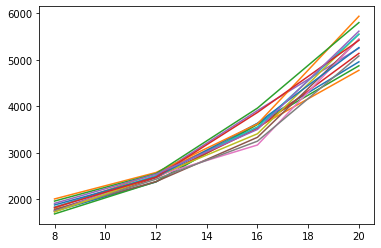

In [16]:
contexts = torch.tensor(
    [
        [0.02, 8],
        [0.02, 12],
        [0.02, 16],
        [0.02, 20],
    ]
)
changing_idx = 1
X = torch.cat(
    [arms.unsqueeze(-2).repeat(1, contexts.shape[0], 1), contexts.repeat(arms.shape[0], 1, 1)], dim=-1
)

for x_ in X:
    y = torch.zeros(x_.shape[0])
    for i, x__ in enumerate(x_):
        y[i] = function(x__.view(1, 1, -1), run_seed=seed)
    plt.plot(contexts[:, changing_idx], y)

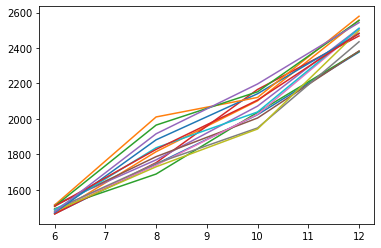

In [17]:
contexts = torch.tensor(
    [
        [0.02, 6],
        [0.02, 8],
        [0.02, 10],
        [0.02, 12],
    ]
)
changing_idx = 1
X = torch.cat(
    [arms.unsqueeze(-2).repeat(1, contexts.shape[0], 1), contexts.repeat(arms.shape[0], 1, 1)], dim=-1
)

for x_ in X:
    y = torch.zeros(x_.shape[0])
    for i, x__ in enumerate(x_):
        y[i] = function(x__.view(1, 1, -1), run_seed=seed)
    plt.plot(contexts[:, changing_idx], y)

In [3]:
from contextual_rs.test_functions.covid_exp_class import CovidEvalV2

true_function = CovidEvalV2()

X = torch.tensor([[[0.2, 0.2, 0.02, 6]]])
true_function(X), function(X)

(tensor([[[1482.9000]]]), tensor([[[1542.]]]))